<a href="https://colab.research.google.com/github/shaurya0702-droid/ML_CLASSIFICATION-GENDER-identify/blob/main/MLCC_Gender_Identify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google-ml-edu==0.1.2 \
    keras~=3.8.0 \
    matplotlib~=3.10.0 \
    numpy~=2.0.0 \
    pandas~=2.2.0 \
    tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.1 which is incomp

In [3]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()


Saving ACTS_student_health_dataset.csv to ACTS_student_health_dataset.csv


In [4]:
import keras
import ml_edu.experiment
import ml_edu.results
import numpy as np
import pandas as pd
import plotly.express as px

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Ran the import statements.")

Ran the import statements.


In [5]:
gender_dataset_raw = pd.read_csv('ACTS_student_health_dataset.csv')

In [6]:
# Read and provide statistics on the dataset.
gender_dataset = gender_dataset_raw[[
    'Height',
    'Weight',
    'ShoeSize',
    'VoicePitch',
    'RestingHeartRate',
    'SleepHoursPerDay',
    'Gender',
]]

gender_dataset.describe()

,Height,Weight,ShoeSize,VoicePitch,RestingHeartRate,SleepHoursPerDay
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,168.7,65.2,7.7,167.1,74.0,7.5
std,9.4,11.6,1.5,53.4,6.8,1.1
min,141.7,33.8,4.4,61.0,53.0,4.4
25%,162.2,56.8,6.5,120.0,69.0,6.8
50%,168.6,64.0,7.7,159.5,74.0,7.4
75%,175.2,73.1,9.0,215.0,78.0,8.2
max,196.6,103.9,11.4,310.0,98.0,10.6


In [7]:
# Create five 2D plots of the features against each other, color-coded by class.
for x_axis_data, y_axis_data in [
    ('Height', 'Weight'),
    ('Height', 'VoicePitch'),
    ('Weight', 'VoicePitch'),
    ('ShoeSize', 'VoicePitch'),
    ('ShoeSize', 'Height'),
    ('ShoeSize', 'Weight'),
]:
  px.scatter(gender_dataset, x=x_axis_data, y=y_axis_data, color='Gender').show()

In [8]:
# Plot major and minor axis length and eccentricity, with observations
# color-coded by class.
px.scatter_3d(
    gender_dataset,
    x='Height',
    y='Weight',
    z='VoicePitch',
    color='Gender',
).show()

#optional

In [9]:
# Calculate the Z-scores of each numerical column in the raw data and write
# them into a new DataFrame named df_norm.

feature_mean = gender_dataset.mean(numeric_only=True)
feature_std = gender_dataset.std(numeric_only=True)
numerical_features = gender_dataset.select_dtypes('number').columns
normalized_dataset = (
    gender_dataset[numerical_features] - feature_mean
) / feature_std

# Copy the class to the new dataframe
normalized_dataset['Gender'] = gender_dataset['Gender']

# Examine some of the values of the normalized training set. Notice that most
# Z-scores fall between -2 and +2.
normalized_dataset.head()

,Height,Weight,ShoeSize,VoicePitch,RestingHeartRate,SleepHoursPerDay,Gender
0,0.9,1.7,0.7,-1.2,-0.9,1.0,Male
1,-1.1,-1.0,-1.3,1.4,-1.0,-1.2,Female
2,2.1,1.9,0.4,-0.8,-1.6,-1.7,Male
3,1.4,0.6,1.3,-0.6,-0.1,-1.5,Male
4,0.3,-0.1,1.4,-0.8,0.3,-2.3,Male


In [10]:
keras.utils.set_random_seed(42)

In [11]:
# Create a column setting the Male label to '1' and the Female label to '0'
# then show 10 randomly selected rows.
normalized_dataset['Class_Bool'] = (
    # Returns true if class is Male, and false if class is Female
    normalized_dataset['Gender'] == 'Male'
).astype(int)
normalized_dataset.sample(10)

,Height,Weight,ShoeSize,VoicePitch,RestingHeartRate,SleepHoursPerDay,Gender,Class_Bool
521,-0.3,-0.3,1.1,-0.7,-2.8,-0.1,Male,1
737,1.4,-0.3,1.1,-0.9,-0.3,1.0,Male,1
740,1.4,2.1,1.3,-1.4,0.3,-0.2,Male,1
660,-1.3,0.8,-1.2,1.1,-0.3,0.0,Female,0
411,-0.4,-1.5,-0.7,0.8,2.7,0.0,Female,0
678,0.0,-1.9,-0.5,1.0,0.9,1.0,Female,0
626,1.2,1.6,1.1,-1.2,0.3,-1.7,Male,1
513,-1.6,0.4,-1.3,1.1,1.0,-0.3,Female,0
859,1.6,-0.8,1.3,-0.6,1.0,2.3,Male,1
136,1.2,0.0,1.0,-1.3,-1.0,-0.4,Male,1


In [12]:
# Create indices at the 80th and 90th percentiles
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples * 0.1)

# Randomize order and split into train, validation, and test with a .8, .1, .1 split
shuffled_dataset = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_dataset.iloc[0:index_80th]
validation_data = shuffled_dataset.iloc[index_80th:index_90th]
test_data = shuffled_dataset.iloc[index_90th:]

# Show the first five rows of the last split
test_data.head()

,Height,Weight,ShoeSize,VoicePitch,RestingHeartRate,SleepHoursPerDay,Gender,Class_Bool
907,-0.1,1.4,1.7,-0.5,0.3,-1.3,Male,1
495,0.6,1.7,1.3,-0.6,-0.9,0.7,Male,1
502,0.6,0.0,1.0,-1.0,0.0,-0.1,Male,1
215,-0.1,2.4,0.7,-0.6,-1.0,-0.4,Male,1
394,2.4,0.6,1.5,-1.3,0.4,0.1,Male,1


In [13]:
label_columns = ['Gender', 'Class_Bool']

train_features = train_data.drop(columns=label_columns)
train_labels = train_data['Class_Bool'].to_numpy()
validation_features = validation_data.drop(columns=label_columns)
validation_labels = validation_data['Class_Bool'].to_numpy()
test_features = test_data.drop(columns=label_columns)
test_labels = test_data['Class_Bool'].to_numpy()

In [14]:
# Name of the features we'll train our model on.
input_features = [
    'Height',
    'Weight',
    'VoicePitch',
]

In [15]:
# @title Define the functions that create and train a model.


def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple classification model."""
  model_inputs = [
      keras.Input(name=feature, shape=(1,))
      for feature in settings.input_features
  ]
  # Use a Concatenate layer to assemble the different inputs into a single
  # tensor which will be given as input to the Dense layer.
  # For example: [input_1[0][0], input_2[0][0]]

  concatenated_inputs = keras.layers.Concatenate()(model_inputs)
  model_output = keras.layers.Dense(
      units=1, name='dense_layer', activation=keras.activations.sigmoid
  )(concatenated_inputs)
  model = keras.Model(inputs=model_inputs, outputs=model_output)
  # Call the compile method to transform the layers into a model that
  # Keras can execute.  Notice that we're using a different loss
  # function for classification than for regression.
  model.compile(
      optimizer=keras.optimizers.RMSprop(
          settings.learning_rate
      ),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics,
  )
  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Feed a dataset into the model in order to train it."""

  # The x parameter of keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in settings.input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=settings.batch_size,
      epochs=settings.number_epochs,
  )

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8668 - loss: 0.3273 
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8737 - loss: 0.3218  
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8769 - loss: 0.3179
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8803 - loss: 0.3144  
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8844 - loss: 0.3111
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8876 - loss: 0.3078
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8915 - loss: 0.3047
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8915 - loss: 0.3015
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8912 - loss: 0.2985 
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8915 - loss: 0.2954  
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8941 - loss: 0.2925 
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8941 - loss: 0.28

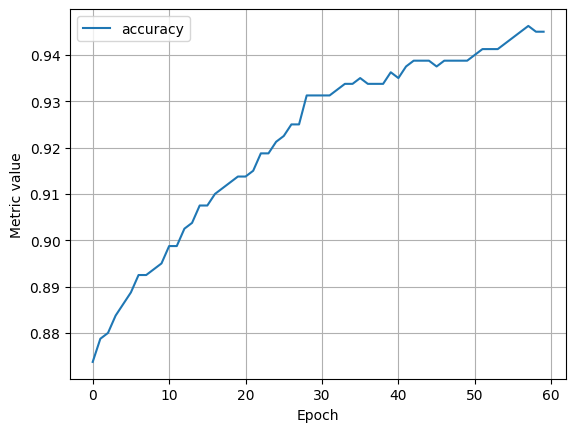

In [16]:
# Let's define our first experiment settings.
settings = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.35,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)

# Plot metrics vs. epochs
ml_edu.results.plot_experiment_metrics(experiment, ['accuracy'])

In [19]:
def compare_train_validation(experiment: ml_edu.experiment.Experiment, validation_metrics: dict[str, float]):
  print('Comparing metrics between train and validation:')
  for metric, validation_value in validation_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Validation {metric}:  {validation_value:.4f}')


# Evaluate validation metrics
validation_metrics = experiment.evaluate(validation_features, validation_labels)
compare_train_validation(experiment, validation_metrics)

Comparing metrics between train and validation:
------
Train accuracy: 0.9450
Validation accuracy:  0.9300
------
Train loss: 0.1836
Validation loss:  0.1937


In [22]:
#@title Solution
# Features used to train the model on.
# Specify all features.
all_input_features = [
    'Height',
    'Weight',
    'ShoeSize',
    'VoicePitch',
    'RestingHeartRate',
    'SleepHoursPerDay',
]

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7508 - loss: 0.5311
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7663 - loss: 0.5141  
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7768 - loss: 0.5022 
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7900 - loss: 0.4915 
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8027 - loss: 0.4813 
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8139 - loss: 0.4715 
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8170 - loss: 0.4620 
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8199 - loss: 0.4526 
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8280 - loss: 0.4435 
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8337 - loss: 0.4345 
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8360 - loss: 0.4258 
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8423 - loss: 0.4172 


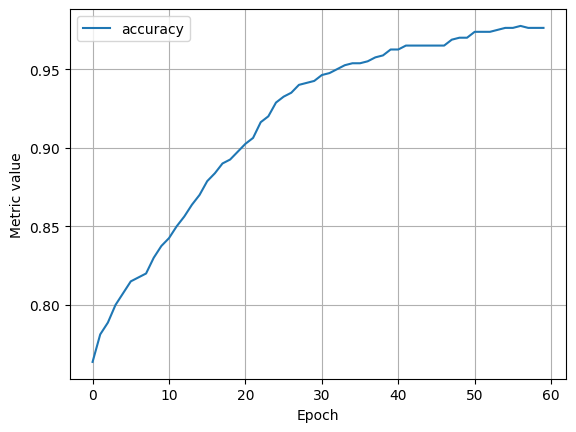

In [24]:
settings_all_features = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.5,
    input_features=all_input_features,
)

# Modify the following definition of METRICS to generate accuracy
metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy',
        threshold=settings_all_features.classification_threshold,
    ),

]

# Establish the model's topography.
model_all_features = create_model(settings_all_features, metrics)

# Train the model on the training set.
experiment_all_features = train_model(
    'all features',
    model_all_features,
    train_features,
    train_labels,
    settings_all_features,
)

# Plot metrics vs. epochs
ml_edu.results.plot_experiment_metrics(
    experiment_all_features, ['accuracy']
)

In [25]:
validation_metrics_all_features = experiment_all_features.evaluate(
    validation_features,
    validation_labels,
)
compare_train_validation(experiment_all_features, validation_metrics_all_features)

Comparing metrics between train and validation:
------
Train accuracy: 0.9762
Validation accuracy:  0.9700
------
Train loss: 0.1629
Validation loss:  0.1670


In [26]:
test_metrics_all_features = experiment_all_features.evaluate(
    test_features,
    test_labels,
)
for metric, test_value in test_metrics_all_features.items():
  print(f'Test {metric}:  {test_value:.4f}')

Test accuracy:  0.9500
Test loss:  0.1805
